In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def fit_msd(msd, tmin, tmax, timestep=0.5):
    """
    Args:
        msd: (n_blk x msd_count) msd array
        tmin, tmax: max and minimal indices to fit

    Returns:
        [slope, err] array
    """
    t = np.arange(0, timestep*msd.shape[0], timestep)
    x = np.vstack([t, np.ones(len(t))]).T
    tmin = int(tmin//timestep)
    tmax = int(tmax//timestep)
    slope = np.linalg.lstsq(x[tmin:tmax], msd[tmin:tmax], rcond=None)[0][0]
    return slope

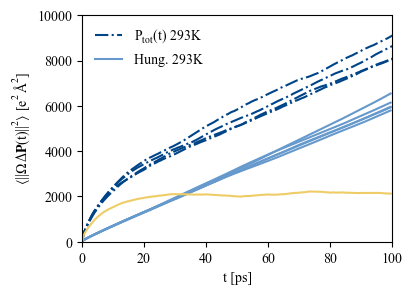

In [14]:
plt.figure(figsize=[4,3], dpi=100)

for i in range(1,5):
    ons = np.loadtxt(f'../data/naoh_onsager/B512-C3-T293K/corr_seg{i}.dat')
    p = ons @ [0, 1, 4, 1, -4, 2, -4]
    t = ons[:,0]
    l1, = plt.plot(t, p, color='C0', ls='-.')
    
    
old_dir = '/home/yunqi/proj_cond/2019_NaOH/results/naoh_h2o-runner'
old_tag = 'CSVR-5ns-0.01ps-E50/4RUNS/MSD-MAX100ps-B4ns.npz'
old_data = np.load(f'{old_dir}/B512-C3-T293K/{old_tag}')
t = np.arange(0,100,0.5)
l2 = plt.plot(t, old_data['j'].T, color='C3')
plt.plot(t, p[:200]-old_data['j'].T[:,0], color='C5')


plt.xlim(0,100)
plt.ylim(0,10000)
plt.xlabel('t [ps]')
plt.ylabel(R'$\langle \|\| \Omega\,\Delta \mathbf{P}(t) \|\|^2 \rangle$ [$e^2\, \AA^2$]')

plt.legend([l1, l2[0]], ['$P_\mathrm{tot}(t)$ 293K', 'Hung. 293K'])
plt.savefig('naoh_msd_check.pdf')


In [171]:
def macro_plot(T, C=0):
    NAOH_CONC = [1,2,3,5,7,8,10,12,13,15]
    concs = np.array(NAOH_CONC)
    mol = concs/(64-2*concs)/(15.9994+1.0079*2)*1000
    all_sigma = [[0]*4]
    for c in NAOH_CONC:
        this_sigma = []
        cell = np.loadtxt(f'../data/naoh_onsager/B512-C{c}-T{T}K/cell.dat')[0]
        e = 1.602e-19
        kb = 1.38e-23
        factor = 1e-20*1e12*e**2/kb/T/((1e-10*cell)**3)/6*1e3/1e2
        for i in range(1,5):
            ons = np.loadtxt(f'../data/naoh_onsager/B512-C{c}-T{T}K/corr_seg{i}.dat')
            p = ons @ [0, 1, 4, 1, -4, 2, -4]
            this_sigma.append(fit_msd(p, 80, 100)*factor)
        all_sigma.append(this_sigma)

    all_sigma = np.array(all_sigma)
    new_sig = all_sigma.mean(axis=1)
    new_sig_std = all_sigma.std(axis=1)

    old_data = np.loadtxt(f'/home/yunqi/proj_cond/2019_NaOH/dat/sig-naoh-{T}k.dat')
    m = old_data[:,0]
    sig = old_data[:,3]
    sig_std = old_data[:,4]
    plt.errorbar(m, new_sig, new_sig_std, color=f'C{C}', ls='-.', marker='s', ms=5)
    plt.errorbar(m, sig, sig_std, ms=5, marker='o', color=f'C{C+3}', mec='k')

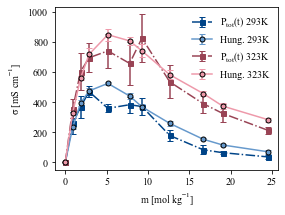

In [172]:
plt.figure(figsize=[4,3])
    
macro_plot(293, 0)
macro_plot(323, 1)

plt.legend(['$P_\mathrm{tot}(t)$ 293K', 'Hung. 293K', '$P_\mathrm{tot}(t)$ 323K','Hung. 323K'])
plt.xlabel('m [mol kg$^{-1}$]')
plt.ylabel('$\sigma$ [mS cm$^{-1}$]')
plt.savefig('naoh_check.pdf')